In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [2]:
df_cust = pd.read_csv("/content/Mall_Customers.csv")
df_cust

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
from sklearn.cluster import KMeans

In [4]:
## basic clustering on age and spending -2d

In [5]:
df_cust.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
sel_cols = ['Age', 'Spending Score (1-100)']
df_cust[sel_cols]

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


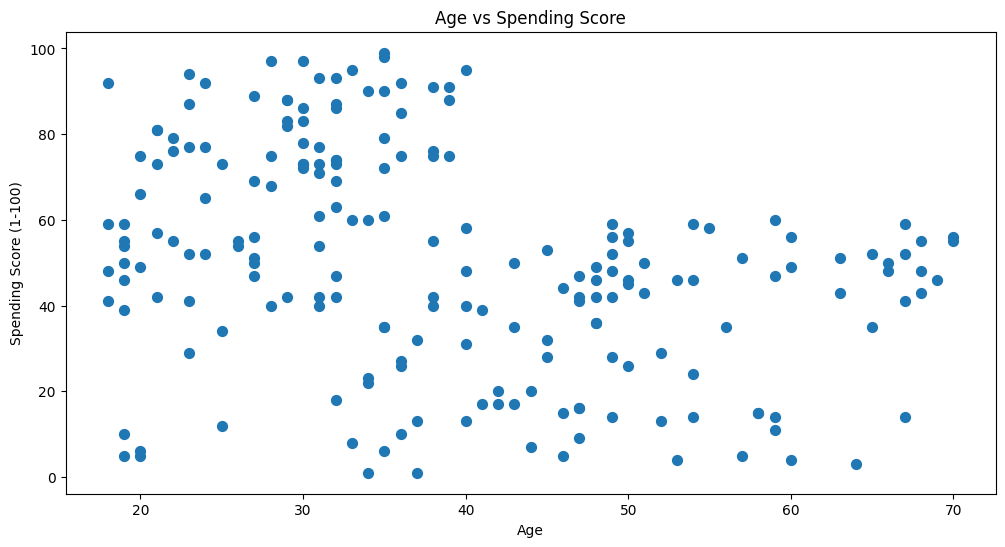

In [10]:
plt.subplots(figsize=(12,6))
plt.scatter(x="Age", y="Spending Score (1-100)", data=df_cust, s=50)
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [11]:
## decide the k value

In [12]:
elbow = df_cust[["Age", "Spending Score (1-100)"]].iloc[:,:].values
elbow

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [14]:
inertia = []

In [24]:
for n in range(1,11):
  algo = KMeans(n_clusters=n, init="k-means++",n_init= 11 ,random_state=45, max_iter=300, tol=.00001, algorithm="elkan")
  algo.fit(elbow)
  inertia.append(algo.inertia_)

/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_kmeans.py:1408: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



In [17]:
inertia

[171535.50000000003,
 75949.15601023012,
 45844.53681626927,
 28165.583566629342,
 23954.645994076847,
 20026.014430364306,
 18454.34760348584,
 13234.00591025462,
 11516.213772129899,
 10444.420378368084]

In [ ]:
# plot the elbow chart

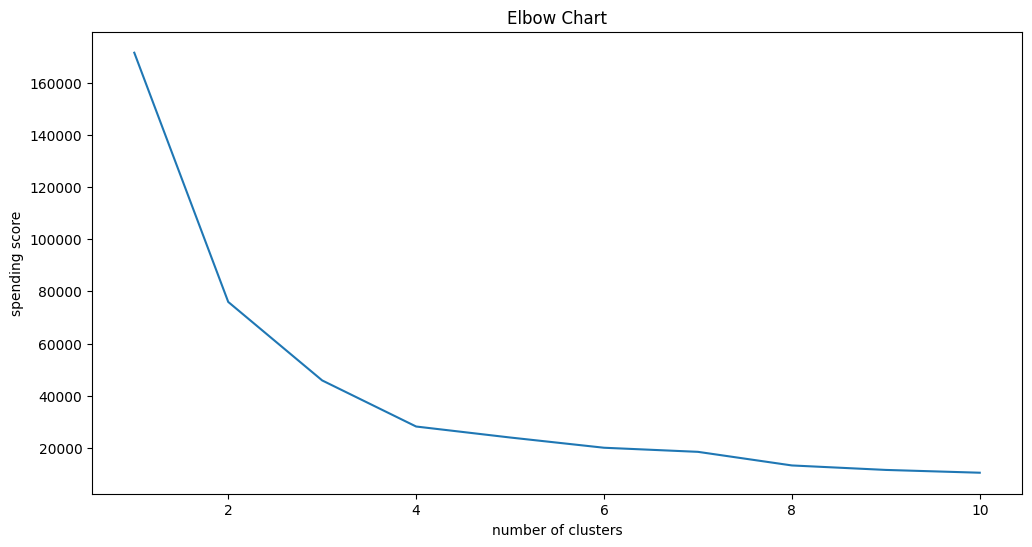

In [23]:
plt.subplots(figsize=(12,6))
plt.plot(np.arange(1,11), inertia, '-')
plt.title("Elbow Chart")
plt.xlabel("number of clusters")
plt.ylabel("spending score")
plt.show()

In [45]:
#letus start with k =3
algo_3 = KMeans(n_clusters=3, init="k-means++",n_init= 11 ,random_state=45, max_iter=300, tol=.00001, algorithm="elkan")
algo_3.fit(elbow)

KMeans(algorithm='elkan', n_clusters=3, n_init=11, random_state=45, tol=1e-05)

In [46]:
from numpy._core.defchararray import center
labels1 = algo_3.labels_
centroids = algo_3.cluster_centers_
labels1

array([2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [47]:
centroids

array([[29.56451613, 80.74193548],
       [42.95744681, 14.59574468],
       [43.05494505, 47.78021978]])

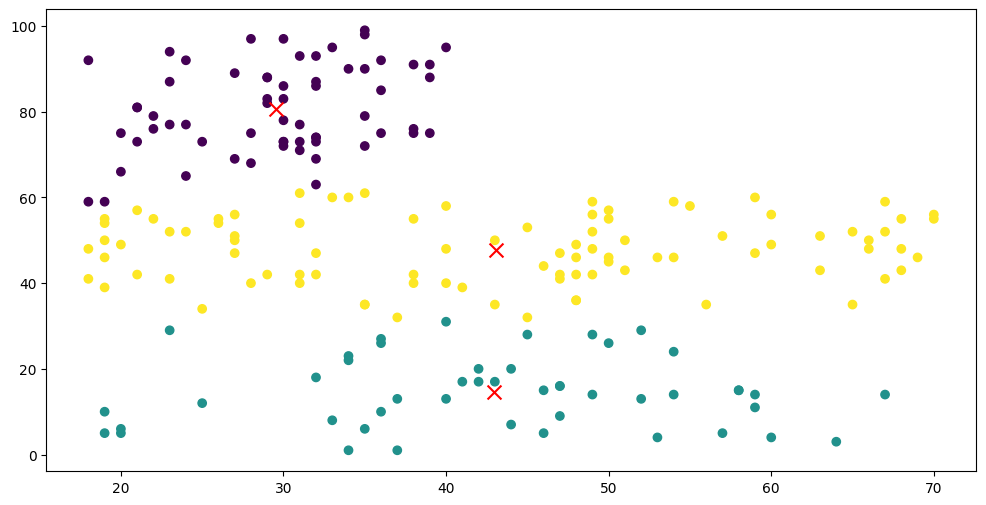

In [48]:
## plot the clusters

plt.subplots(figsize=(12,6))
plt.scatter(elbow[:,0], elbow[:,1], c=labels1, cmap="viridis")
plt.scatter(centroids[:,0], centroids[:,1], color="red", s=100, marker="x")
plt.show()

In [51]:
df_label2 = pd.DataFrame(labels1, columns=["clusters"])
df_label2

,clusters
0,2
1,0
2,1
3,0
4,2
...,...
195,0
196,1
197,0
198,1


In [52]:
df_cust = pd.concat([df_cust, df_label2], axis=1)
df_cust

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1
